<a href="https://colab.research.google.com/github/drawcodeboy/Cat_n_Dog_Classification/blob/main/ver2_1_cat_n_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split

In [ ]:
# Modeling

# 1st Conv
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3,
                              padding = 'same', input_shape=(224, 224, 1),
                              kernel_regularizer=keras.regularizers.l2(0.002)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
# 2nd Conv
model.add(keras.layers.Conv2D(64, kernel_size=3,
                              padding = 'same',
                              kernel_regularizer=keras.regularizers.l2(0.002)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
# 3rd Conv
model.add(keras.layers.Conv2D(128, kernel_size=3,
                              padding = 'same',
                              kernel_regularizer=keras.regularizers.l2(0.002)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
# Dense
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,
                             kernel_regularizer=keras.regularizers.l2(0.002)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

Batch Normalization reference
https://eehoeskrap.tistory.com/430
L2 Regularization (1)
https://junstar92.tistory.com/102
L2 Regularization (2)
https://www.kaggle.com/general/226433

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   shear_range =0.7,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   validation_split=0.06
                                   )

train_generator = train_data_generator.flow_from_directory(
        '/content/drive/MyDrive/cat_n_dog/training_set/training_set',
        target_size = (224, 224),
        batch_size = BATCH_SIZE,
        class_mode = 'binary',
        color_mode ='grayscale',
        shuffle = True,
        subset='training')

val_generator = train_data_generator.flow_from_directory(
        '/content/drive/MyDrive/cat_n_dog/training_set/training_set',
        target_size = (224, 224),
        batch_size = BATCH_SIZE,
        class_mode = 'binary',
        color_mode ='grayscale',
        shuffle = True,
        subset='validation')

test_data_generator = ImageDataGenerator(rescale=1./255)

test_generator = test_data_generator.flow_from_directory(
        '/content/drive/MyDrive/cat_n_dog/test_set/test_set',
        target_size = (224, 224),
        batch_size = BATCH_SIZE,
        class_mode = 'binary',
        color_mode ='grayscale')

Found 7523 images belonging to 2 classes.
Found 480 images belonging to 2 classes.
Found 2022 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, verbose=1,
                                                  restore_best_weights=True)

learning_rate_reduction_cb = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', patience = 10, verbose=1, factor=0.5, min_lr=0.00001,
    cooldown=5
)

In [ ]:
# Training

history = model.fit(train_generator, epochs=200, validation_data=val_generator,
                    steps_per_epoch = 7525//BATCH_SIZE+1, validation_steps = 480//BATCH_SIZE+1,
               callbacks=[early_stopping_cb, learning_rate_reduction_cb])

Epoch 1/200
118/118 [==============================] - 992s 8s/step - loss: 2.7453 - accuracy: 0.6261 - val_loss: 1.4259 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/200
118/118 [==============================] - 130s 1s/step - loss: 1.0811 - accuracy: 0.6711 - val_loss: 1.1484 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/200
118/118 [==============================] - 129s 1s/step - loss: 0.9687 - accuracy: 0.6980 - val_loss: 1.1618 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/200
118/118 [==============================] - 130s 1s/step - loss: 0.9146 - accuracy: 0.7070 - val_loss: 1.2422 - val_accuracy: 0.5063 - lr: 0.0010
Epoch 5/200
118/118 [==============================] - 134s 1s/step - loss: 0.8619 - accuracy: 0.7319 - val_loss: 0.9669 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 6/200
118/118 [==============================] - 131s 1s/step - loss: 0.8553 - accuracy: 0.7306 - val_loss: 0.9405 - val_accuracy: 0.6625 - lr: 0.0010
Epoch 7/200
118/118 [==============================] - 129

자동으로 저장할 수 없습니다. 이 파일은 원격으로 또는 다른 탭에서 업데이트되었습니다

In [ ]:
def show_graph(history_):
    accuracy = history_.history['accuracy']
    val_accuracy = history_.history['val_accuracy']
    loss = history_.history['loss']
    val_loss = history_.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 2))

    plt.subplot(121)
    plt.ylim(0, 1.1)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()

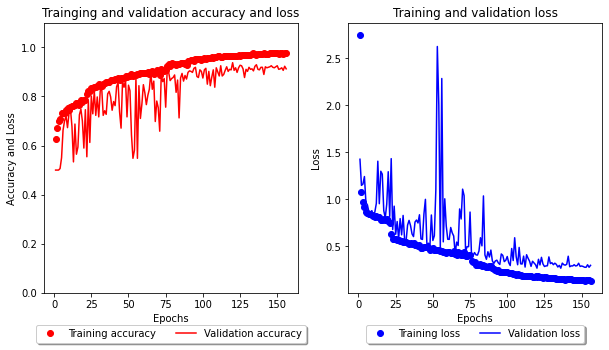

In [ ]:
show_graph(history)

In [ ]:
model.evaluate(test_generator)

32/32 [==============================] - 484s 16s/step - loss: 0.2683 - accuracy: 0.9209


[0.2683250308036804, 0.9208704233169556]

In [ ]:
def print_predict(sample_):
    result = model.predict(sample_)
    result = result[0][0]


    print('RESULT: ', end='')
    if(result < 0.5):
        print('Cat')
    elif(result > 0.5):
        print('Dog')
    else:
        print('Can\'t know')

In [ ]:
def crop_center(img):
    y, x, z = img.shape
    crop_size = min(y, x)

    start_x = x // 2 - (crop_size // 2)
    start_y = y // 2 - (crop_size // 2)
    img = img[start_y:start_y + crop_size, start_x:start_x + crop_size]
    if crop_size < 224: # 확대 할 때, 바이큐빅 보간법
        return cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    elif crop_size > 224: # 축소할 때, 영역 보간법
        return cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    else:
        return img

In [ ]:
from tensorflow.keras.preprocessing import image
import cv2

def predict_fun(sample_path):
    sample = image.load_img(sample_path)
    sample_np = np.array(sample, dtype=np.float32)
    sample_np = sample_np / 255.0
    sample_crop = crop_center(sample_np)
    sample_gray = cv2.cvtColor(sample_crop, cv2.COLOR_BGR2GRAY)
    sample_ = sample_gray.reshape(1, 224, 224, 1)

    print_predict(sample_)
    plt.imshow(sample)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 49ms/step
RESULT: Cat


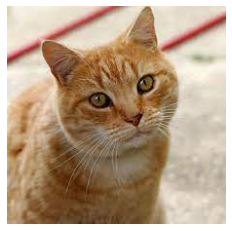

1/1 [==============================] - 0s 48ms/step
RESULT: Cat


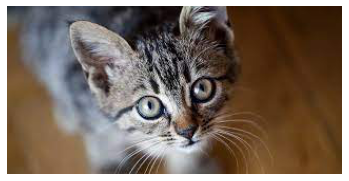

1/1 [==============================] - 0s 48ms/step
RESULT: Cat


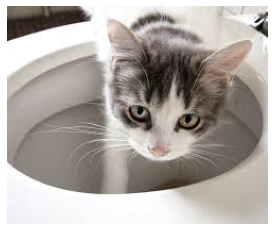

1/1 [==============================] - 0s 48ms/step
RESULT: Cat


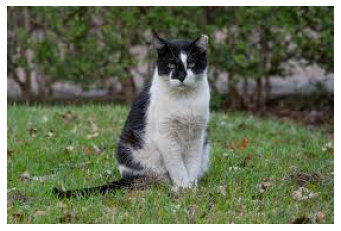

1/1 [==============================] - 0s 47ms/step
RESULT: Cat


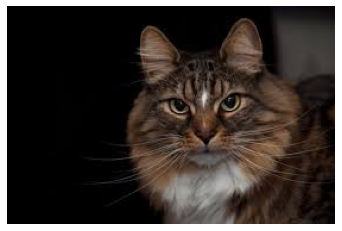

1/1 [==============================] - 0s 48ms/step
RESULT: Dog


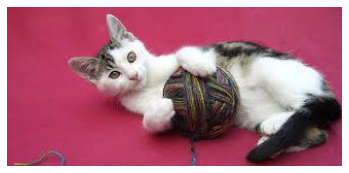

1/1 [==============================] - 0s 49ms/step
RESULT: Cat


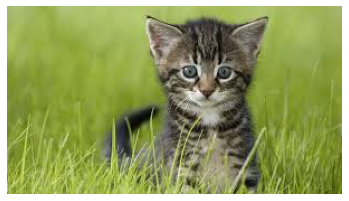

1/1 [==============================] - 0s 49ms/step
RESULT: Cat


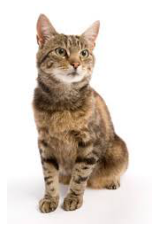

1/1 [==============================] - 0s 49ms/step
RESULT: Cat


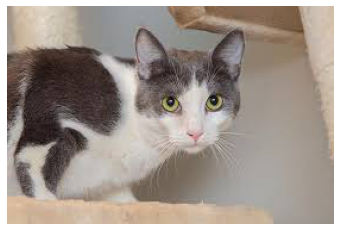

1/1 [==============================] - 0s 48ms/step
RESULT: Cat


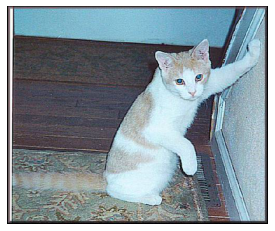

1/1 [==============================] - 0s 48ms/step
RESULT: Cat


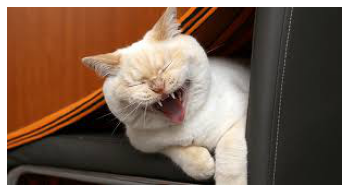

1/1 [==============================] - 0s 48ms/step
RESULT: Cat


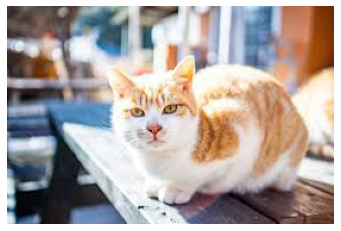

1/1 [==============================] - 0s 48ms/step
RESULT: Cat


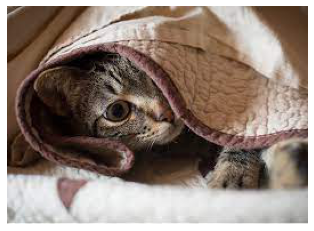

1/1 [==============================] - 0s 48ms/step
RESULT: Dog


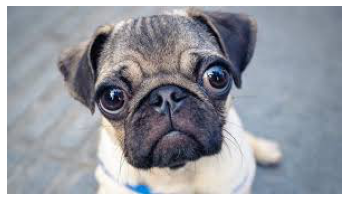

1/1 [==============================] - 0s 48ms/step
RESULT: Dog


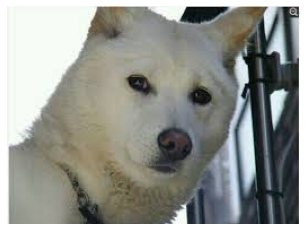

1/1 [==============================] - 0s 48ms/step
RESULT: Dog


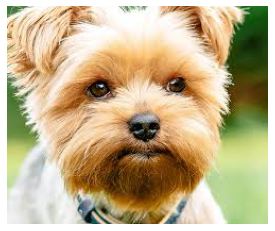

1/1 [==============================] - 0s 47ms/step
RESULT: Cat


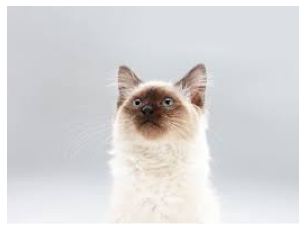

1/1 [==============================] - 0s 47ms/step
RESULT: Cat


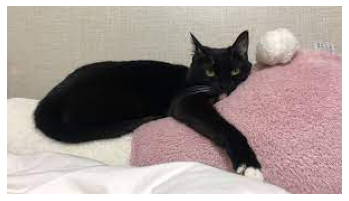

1/1 [==============================] - 0s 48ms/step
RESULT: Dog


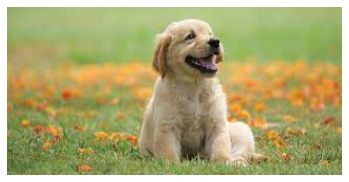

1/1 [==============================] - 0s 47ms/step
RESULT: Dog


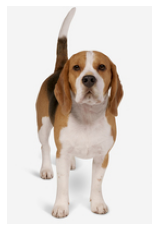

1/1 [==============================] - 0s 47ms/step
RESULT: Dog


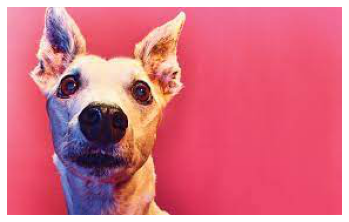

1/1 [==============================] - 0s 48ms/step
RESULT: Dog


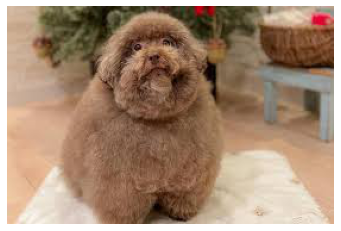

1/1 [==============================] - 0s 47ms/step
RESULT: Dog


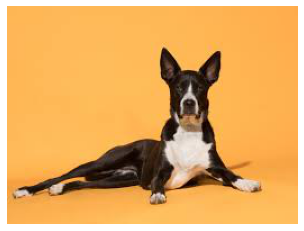

1/1 [==============================] - 0s 49ms/step
RESULT: Dog


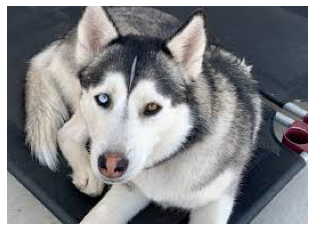

1/1 [==============================] - 0s 48ms/step
RESULT: Dog


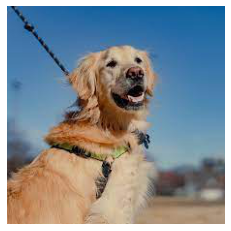

In [ ]:
no_dataset_path = '/content/drive/MyDrive/cat_n_dog/no_dataset'

for dirname, _, filenames in os.walk(no_dataset_path):
    for filename in filenames:
        no_data_path = os.path.join(dirname, filename)
        predict_fun(no_data_path)